In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load data

In [2]:
# Load the data:
data= pd.read_csv('adult.data')
data.head()

,Age,Workclass,Fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### H1 Histogram of Education level

In [3]:
# Load the Education donner
df_education = data[['Education',' Education-num']]
df_education

,Education,Education-num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
32556,Assoc-acdm,12
32557,HS-grad,9
32558,HS-grad,9
32559,HS-grad,9


In [4]:
df_education_num = df_education[' Education-num']
df_education_num

0        13
1        13
2         9
3         7
4        13
         ..
32556    12
32557     9
32558     9
32559     9
32560     9
Name:  Education-num, Length: 32561, dtype: int64

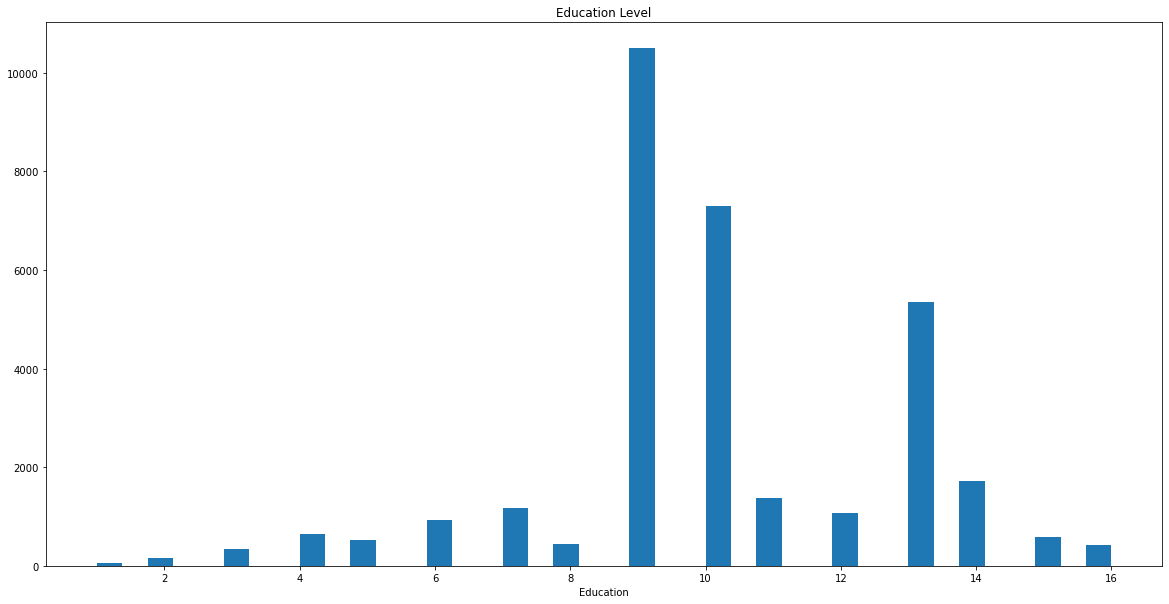

In [5]:
plt.figure(figsize=(20,10))
plt.hist(df_education_num, bins=40)
plt.gca().set(title='Education Level', xlabel='Education');

### H2 Histogram of working hours per week for people with income over 50K

In [6]:
df_hours_per_week = data[['Hours-per-week','Income']] 
df_hours_per_week

,Hours-per-week,Income
0,40,<=50K
1,13,<=50K
2,40,<=50K
3,40,<=50K
4,40,<=50K
...,...,...
32556,38,<=50K
32557,40,>50K
32558,40,<=50K
32559,20,<=50K


In [7]:
df_income_over_50k = pd.DataFrame(df_hours_per_week)
df_income_over_50k = df_income_over_50k[df_income_over_50k['Income'] == ' >50K']
df_income_over_50k

,Hours-per-week,Income
7,45,>50K
8,50,>50K
9,40,>50K
10,80,>50K
11,40,>50K
...,...,...
32539,10,>50K
32545,20,>50K
32554,40,>50K
32557,40,>50K


In [8]:
df_income_over_50k = df_income_over_50k['Hours-per-week']
df_income_over_50k

7        45
8        50
9        40
10       80
11       40
         ..
32539    10
32545    20
32554    40
32557    40
32560    40
Name: Hours-per-week, Length: 7841, dtype: int64

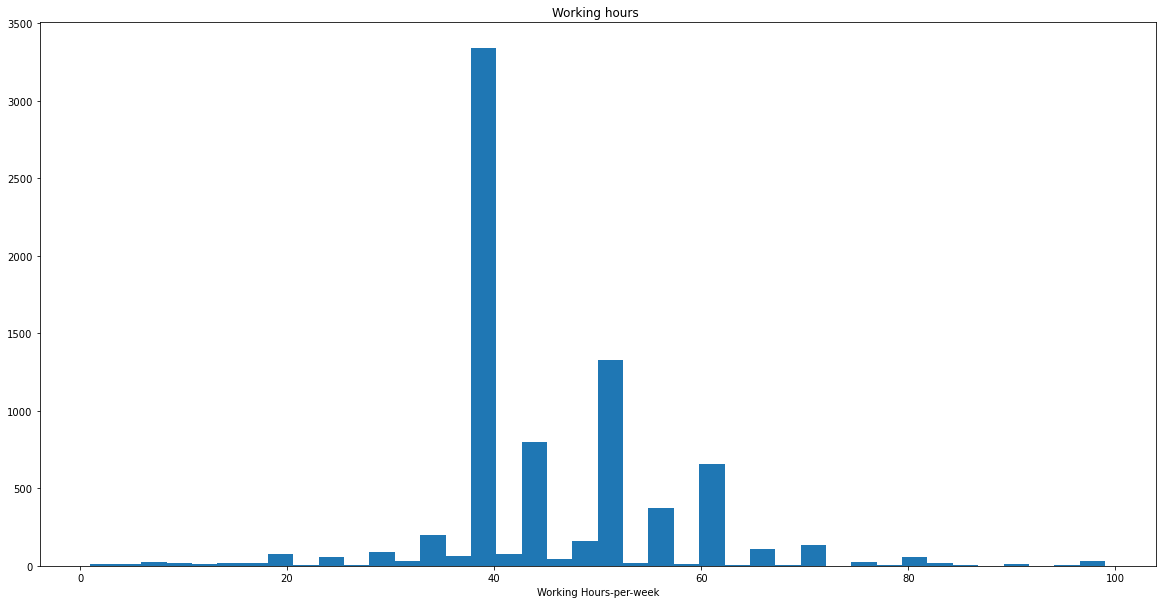

In [9]:
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k, bins=40)
plt.gca().set(title='Working hours ', xlabel='Working Hours-per-week');

### Laplace Mechanism for Histograms

### Q1 
La sensivity est 1 car il s'agit du nombre d'individu dans l'histogramme

### Q2 : Use mechanism Laplace to compute query H1 with {0.01, 0.1, 1}

In [10]:
sensitivity = 1
epsilon = 0.01

df_education_num_001 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_001.head(10)

0   -24.53947
1   -24.53947
2   -28.53947
3   -30.53947
4   -24.53947
5   -23.53947
6   -32.53947
7   -28.53947
8   -23.53947
9   -24.53947
Name:  Education-num, dtype: float64

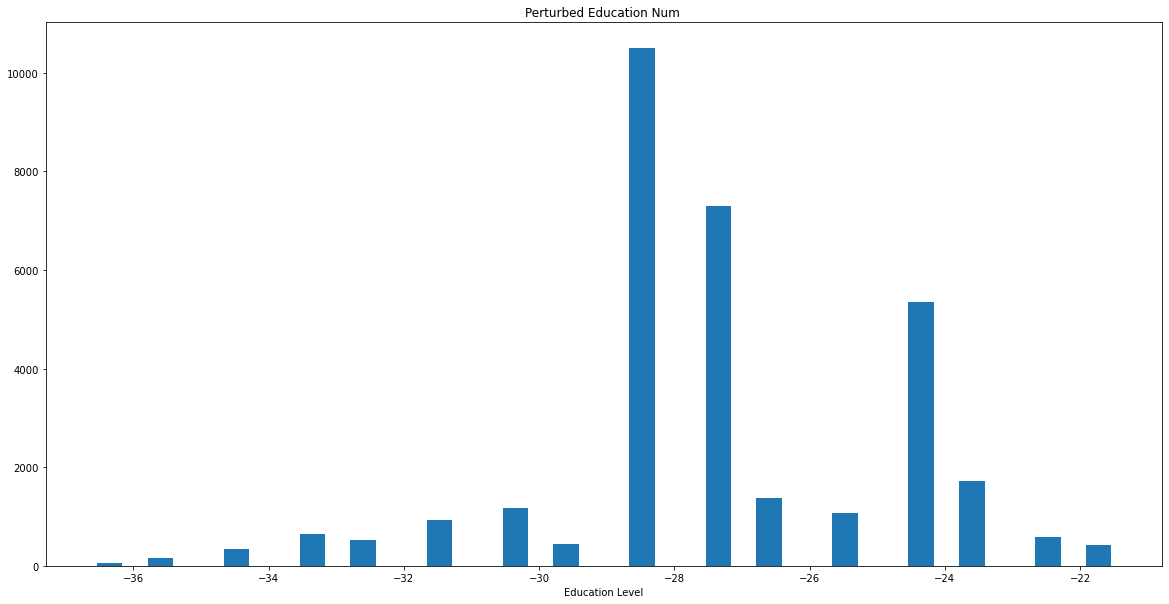

In [11]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_001, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [12]:
sensitivity = 1
epsilon = 0.1

df_education_num_01 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_01.head(20)

0     1.361779
1     1.361779
2    -2.638221
3    -4.638221
4     1.361779
5     2.361779
6    -6.638221
7    -2.638221
8     2.361779
9     1.361779
10   -1.638221
11    1.361779
12    1.361779
13    0.361779
14   -0.638221
15   -7.638221
16   -2.638221
17   -2.638221
18   -4.638221
19    2.361779
Name:  Education-num, dtype: float64

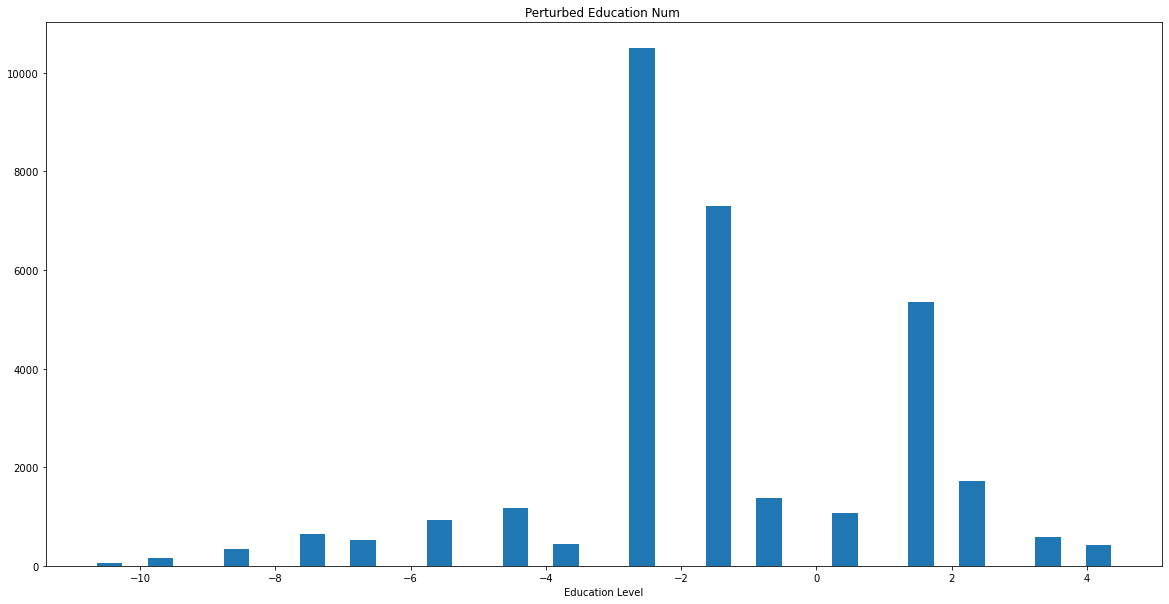

In [13]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [14]:
sensitivity = 1
epsilon = 1

df_education_num_1 = df_education_num + np.random.laplace(loc=0, scale=sensitivity/epsilon)
df_education_num_1.head(20)

0     12.73675
1     12.73675
2      8.73675
3      6.73675
4     12.73675
5     13.73675
6      4.73675
7      8.73675
8     13.73675
9     12.73675
10     9.73675
11    12.73675
12    12.73675
13    11.73675
14    10.73675
15     3.73675
16     8.73675
17     8.73675
18     6.73675
19    13.73675
Name:  Education-num, dtype: float64

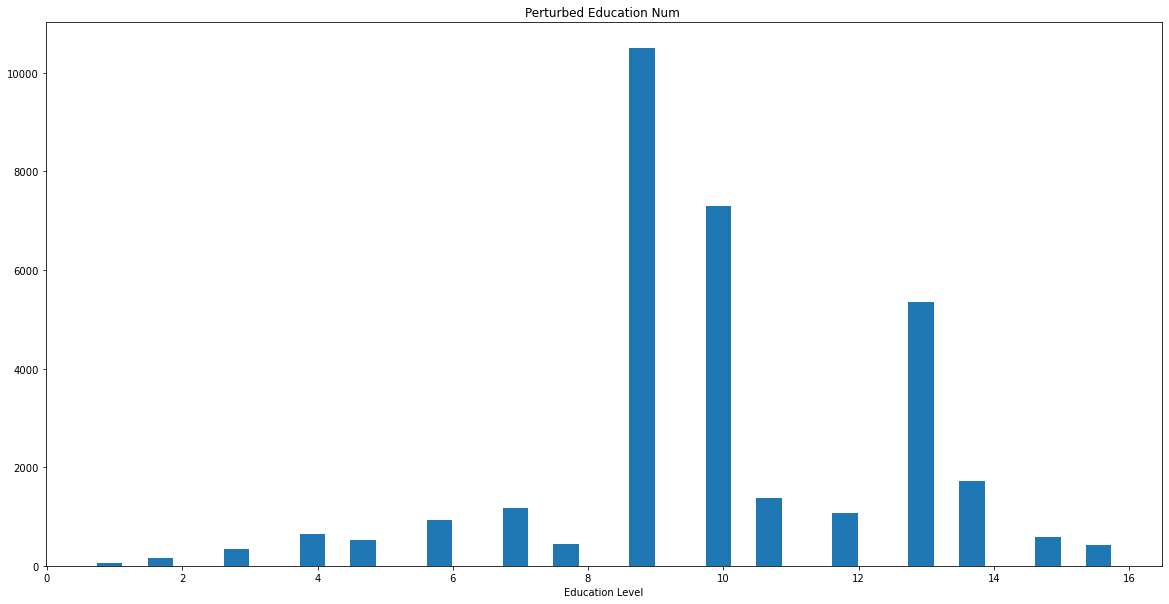

In [15]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_1, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### On constate qu'il n'y a pas de différence entre  les histogrammes des données non-pertubées et ceux des données pertubées

### Q3 1- :  Use mechanism Laplace to compute query H2 with {0.01, 0.1, 1}

In [26]:
## trouvons la sensitivity de la requête H2 : ici il s'agit d'une SUM
sensitivity_h2 = np.amax(df_income_over_50k) 
sensitivity_h2

99

In [27]:
epsilon = 0.01

df_income_over_50k_001 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity_h2 /epsilon)
df_income_over_50k_001.head(20)

7     9365.536099
8     9370.536099
9     9360.536099
10    9400.536099
11    9360.536099
14    9360.536099
19    9365.536099
20    9380.536099
25    9360.536099
27    9380.536099
38    9358.536099
45    9360.536099
52    9380.536099
53    9375.536099
55    9360.536099
63    9365.536099
67    9360.536099
68    9370.536099
72    9390.536099
84    9360.536099
Name: Hours-per-week, dtype: float64

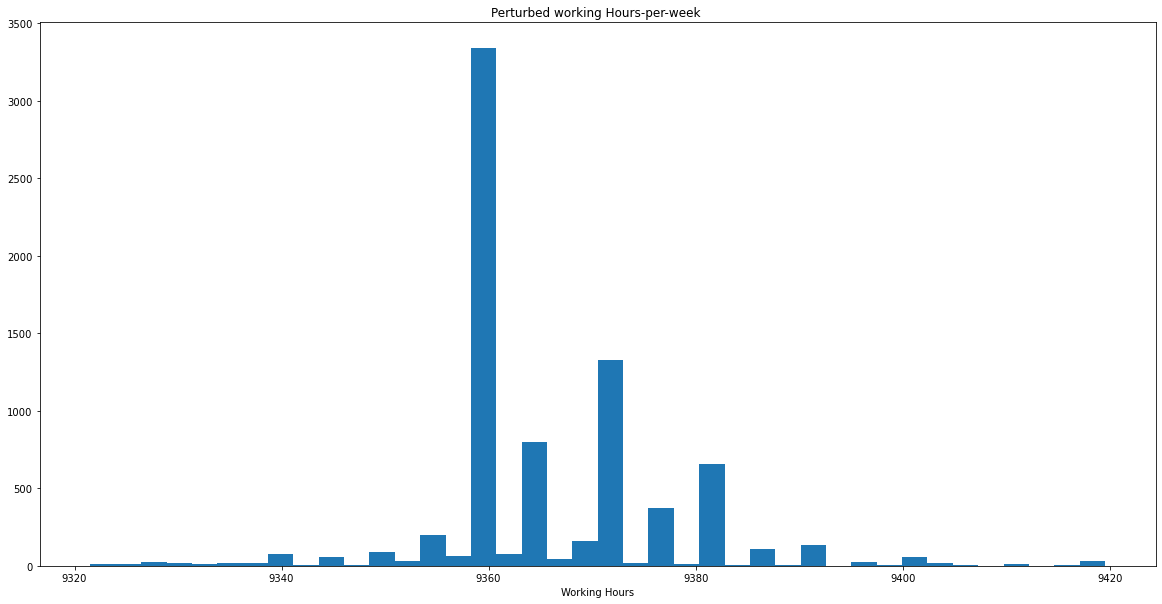

In [28]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_001, bins=40)
plt.gca().set(title='Perturbed working Hours-per-week ', xlabel='Working Hours');

In [29]:
epsilon = 0.1

df_income_over_50k_01 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity_h2 /epsilon)
df_income_over_50k_01.head(20)

7     1979.859762
8     1984.859762
9     1974.859762
10    2014.859762
11    1974.859762
14    1974.859762
19    1979.859762
20    1994.859762
25    1974.859762
27    1994.859762
38    1972.859762
45    1974.859762
52    1994.859762
53    1989.859762
55    1974.859762
63    1979.859762
67    1974.859762
68    1984.859762
72    2004.859762
84    1974.859762
Name: Hours-per-week, dtype: float64

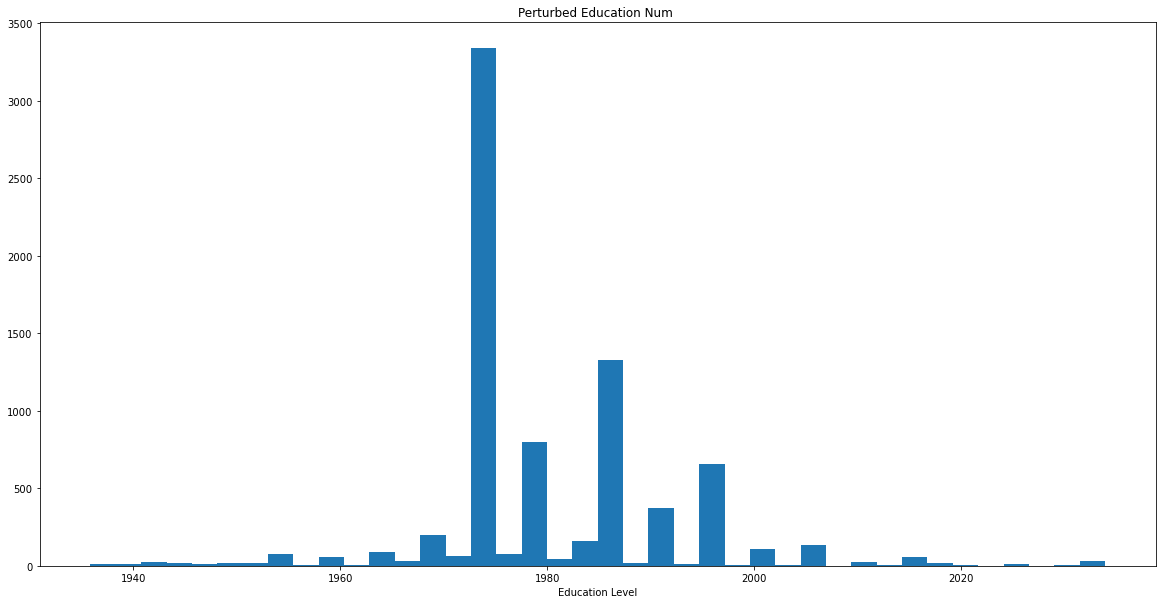

In [30]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [33]:
epsilon = 1

df_income_over_50k_1 = df_income_over_50k + np.random.laplace(loc=0, scale=sensitivity_h2 /epsilon)
df_income_over_50k_1.head(20)

7      97.392543
8     102.392543
9      92.392543
10    132.392543
11     92.392543
14     92.392543
19     97.392543
20    112.392543
25     92.392543
27    112.392543
38     90.392543
45     92.392543
52    112.392543
53    107.392543
55     92.392543
63     97.392543
67     92.392543
68    102.392543
72    122.392543
84     92.392543
Name: Hours-per-week, dtype: float64

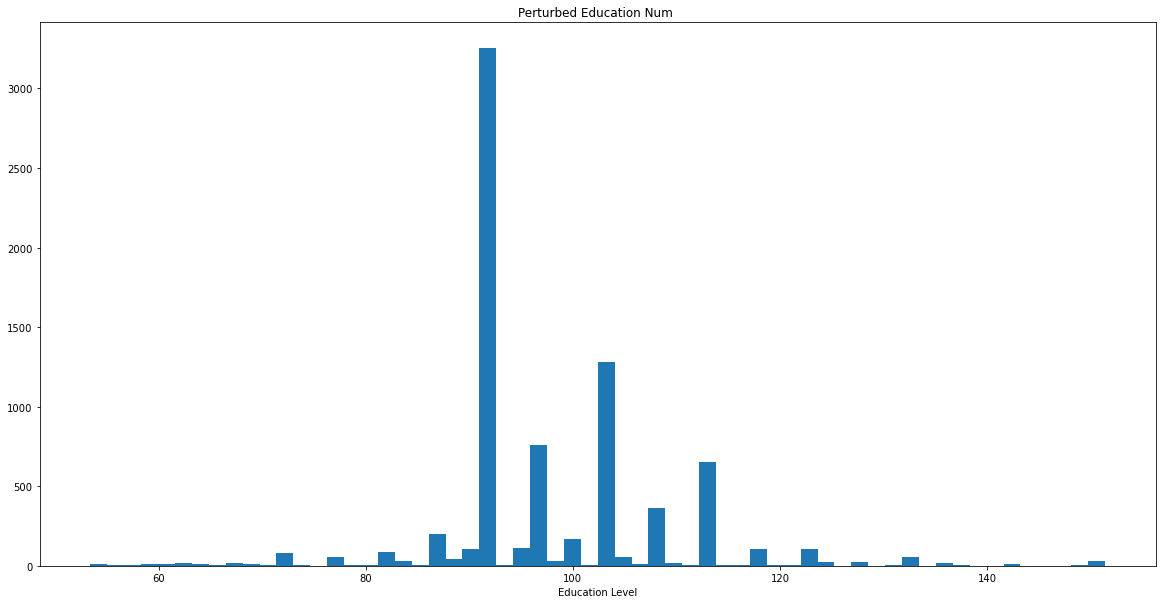

In [36]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_1, bins=60)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### L'augmentation du bins n'a pas d'effet sur l'histogramme( voir ci-dessus)

# 2. Basic Fourier Perturbation Algorithm

#### Q4.Implemention of the Basic FPA algorithm

In [39]:
#fonction de calcul de la transformée de fourier
def bfpa(x, k):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [40]:
x = np.random.random(1024)
#np.allclose(DFT_slow(x), np.fft.fft(x))

In [41]:
np.fft.fft(x)

array([514.26253978+0.j        ,  -3.03416959-1.1632463j ,
        -5.21744662-1.33869247j, ...,  -4.73492727+8.67375705j,
        -5.21744662+1.33869247j,  -3.03416959+1.1632463j ])

In [42]:
coefficient_education = bfpa(df_education_num.values, k = 5)
coefficient_education

(288.70589539938373+13.594715174363955j)

#### Q5. Use Basic FPA to compute query H1

In [ ]:
sensitivity = 1
epsilon = 0.01

df_education_num_001 = df_education_num + np.random.laplace(loc=coefficient_education, scale=sensitivity/epsilon)
df_education_num_001.head(10)

In [ ]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_001, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [ ]:
#Epsilon = 0.1
sensitivity = 1
epsilon = 0.1

df_education_num_01 = df_education_num + np.random.laplace(loc=coefficient_education, scale=sensitivity/epsilon)
df_education_num_01.head(10)

In [ ]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [ ]:
#Epsilon = 1
sensitivity = 1
epsilon = 1

df_education_num_1 = df_education_num + np.random.laplace(loc=coefficient_education, scale=sensitivity/epsilon)
df_education_num_1.head(10)

In [ ]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_education_num_1, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### On constate qu'il n'y a pas de différence entre  les histogrammes des données non-pertubées et ceux des données pertubées

In [ ]:
#### Q6. Use Basic FPA to compute query H2

In [ ]:
coefficient_working_per_week = bfpa(df_education_num.values, k = 5)
coefficient_working_per_week

In [ ]:
sensitivity = 1
epsilon = 0.01

df_income_over_50k_001 = df_income_over_50k + np.random.laplace(loc=coefficient_working_per_week, scale=sensitivity/epsilon)
df_income_over_50k_001.head(10)

In [ ]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_001, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [ ]:
sensitivity = 1
epsilon = 0.1

df_income_over_50k_01 = df_income_over_50k + np.random.laplace(loc=coefficient_working_per_week, scale=sensitivity/epsilon)
df_income_over_50k_01.head(10)

In [ ]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_01, bins=40)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

In [ ]:
sensitivity = 1
epsilon = 1

df_income_over_50k_1 = df_income_over_50k + np.random.laplace(loc=coefficient_working_per_week, scale=sensitivity/epsilon)
df_income_over_50k_1.head(10)

In [ ]:
# Histograms 
plt.figure(figsize=(20,10))
plt.hist(df_income_over_50k_1, bins=80)
plt.gca().set(title='Perturbed Education Num ', xlabel='Education Level');

#### L'augmentation du bins diminue la largeur des barres de l'histogramme (voir l'histogramme ci-dessus)